# 分析当前wind_obs数据与滞后特征（lag features）的相关性，是时间序列分析中的重要步骤。通过分析滞后特征与当前数据的相关性

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 从 CSV 文件导入数据
file_path = r'E:\我的桌面\03.01之前风力发电代码\1ECMWF预报数据和11风场观测数据训练模型\ID01.csv'  # 替换为你的 CSV 文件路径
data = pd.read_csv(file_path)

# 确保时间列是 datetime 类型
data['date_time'] = pd.to_datetime(data['date_time'])

# 设置时间列为索引
data.set_index('date_time', inplace=True)

# 指定开始时间（例如：从 2023-01-01 开始）
start_time = '2023-05-04'
data = data[data.index >= start_time]

print(data.head())

# 创建滞后特征（lag features）
max_lag = 10  # 最大滞后步长
for lag in range(1, max_lag + 1):
    data[f'wind_lag_{lag}'] = data['wind_obs'].shift(lag)

# 处理缺失值（滞后特征引入的缺失值）
data.dropna(inplace=True)

print(data.head())

# 计算当前数据与滞后特征的相关性
correlation_matrix = data.corr()

# 提取当前数据与滞后特征的相关性
target_correlation = correlation_matrix['wind_obs'].drop('wind_obs')

print("当前数据与滞后特征的相关性：")
print(target_correlation)

# 选择相关性最强的滞后特征
best_lag = target_correlation.idxmax()
best_correlation = target_correlation.max()

print(f"最佳滞后特征: {best_lag}, 相关性: {best_correlation:.2f}")

                           ec  wind_obs
date_time                              
2023-05-04 00:00:00  2.684300    6.7678
2023-05-04 06:00:00  4.320868    7.3882
2023-05-04 12:00:00  1.710750    7.2120
2023-05-04 18:00:00  3.673947    6.5004
2023-05-05 00:00:00  4.455652    5.7437
                           ec  wind_obs  wind_lag_1  wind_lag_2  wind_lag_3  \
date_time                                                                     
2023-05-06 12:00:00  3.858416   10.0528      8.3434      7.9619      5.0284   
2023-05-06 18:00:00  4.290216    2.2825     10.0528      8.3434      7.9619   
2023-05-07 00:00:00  4.869043    3.2032      2.2825     10.0528      8.3434   
2023-05-07 06:00:00  7.901182    5.6169      3.2032      2.2825     10.0528   
2023-05-07 12:00:00  5.023913    6.0474      5.6169      3.2032      2.2825   

                     wind_lag_4  wind_lag_5  wind_lag_6  wind_lag_7  \
date_time                                                             
2023-05-06 12:00:00     

C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30697 (\N{CJK UNIFIED IDEOGRAPH-77E9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38453 (\N{CJK UNIFIED IDEOGRAPH-9635}) missing from curren

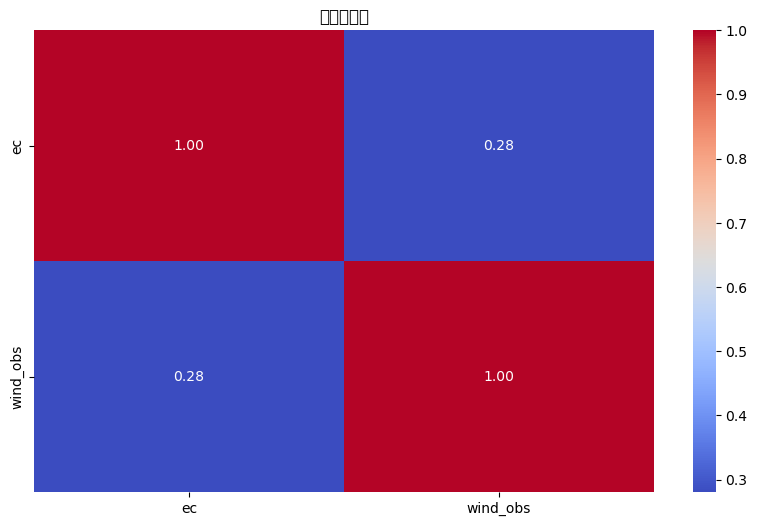

C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24403 (\N{CJK UNIFIED IDEOGRAPH-5F53}) missing from curren

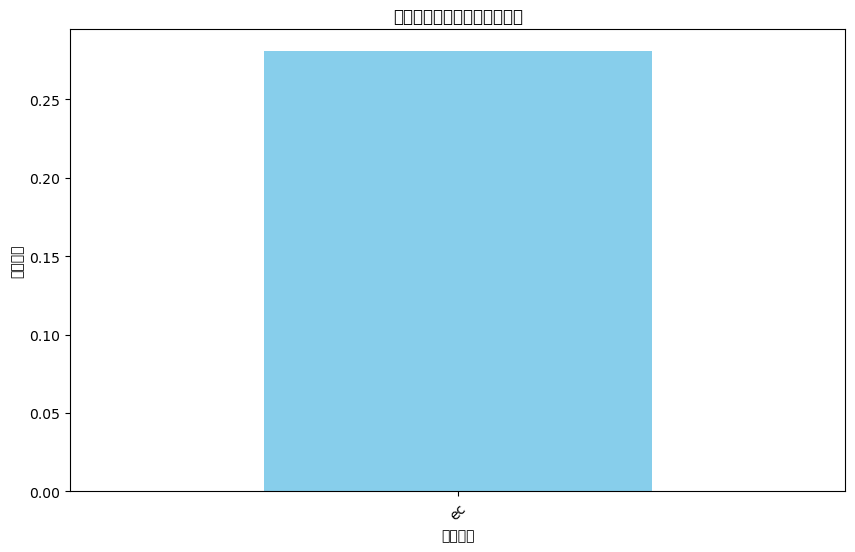

In [9]:
# 可视化相关性矩阵
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('相关性矩阵')
plt.show()

# 可视化当前数据与滞后特征的相关性
plt.figure(figsize=(10, 6))
target_correlation.plot(kind='bar', color='skyblue')
plt.title('当前数据与滞后特征的相关性')
plt.xlabel('滞后特征')
plt.ylabel('相关系数')
plt.xticks(rotation=45)
plt.show()

最佳滞后特征: ec, 相关性: 0.28


C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


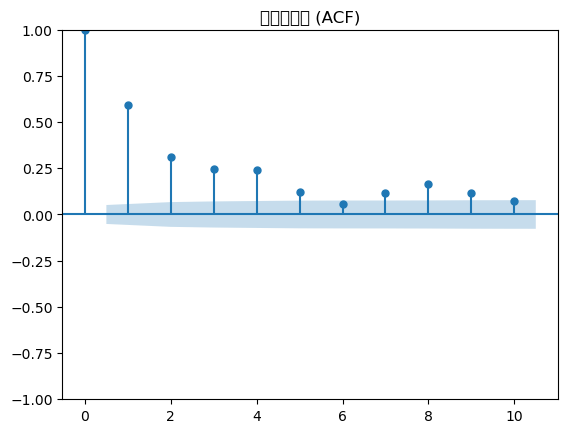

C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20559 (\N{CJK UNIFIED IDEOGRAPH-504F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from curren

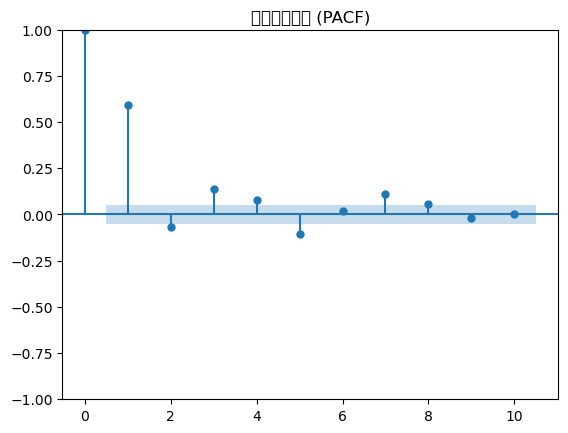

In [11]:
# 绘制自相关函数 (ACF)
plot_acf(data['wind_obs'], lags=max_lag)
plt.title('自相关函数 (ACF)')
plt.show()

# 绘制偏自相关函数 (PACF)
plot_pacf(data['wind_obs'], lags=max_lag)
plt.title('偏自相关函数 (PACF)')
plt.show()

# 换成EC

                           ec  wind_obs
date_time                              
2023-05-04 00:00:00  2.684300    6.7678
2023-05-04 06:00:00  4.320868    7.3882
2023-05-04 12:00:00  1.710750    7.2120
2023-05-04 18:00:00  3.673947    6.5004
2023-05-05 00:00:00  4.455652    5.7437
                           ec  wind_obs  ec_lag_1  ec_lag_2  ec_lag_3  \
date_time                                                               
2023-05-06 12:00:00  3.858416   10.0528  6.282237  4.417980  4.319942   
2023-05-06 18:00:00  4.290216    2.2825  3.858416  6.282237  4.417980   
2023-05-07 00:00:00  4.869043    3.2032  4.290216  3.858416  6.282237   
2023-05-07 06:00:00  7.901182    5.6169  4.869043  4.290216  3.858416   
2023-05-07 12:00:00  5.023913    6.0474  7.901182  4.869043  4.290216   

                     ec_lag_4  ec_lag_5  ec_lag_6  ec_lag_7  ec_lag_8  \
date_time                                                               
2023-05-06 12:00:00  4.072303  4.645464  4.455652  3.673947  1

C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30697 (\N{CJK UNIFIED IDEOGRAPH-77E9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38453 (\N{CJK UNIFIED IDEOGRAPH-9635}) missing from curren

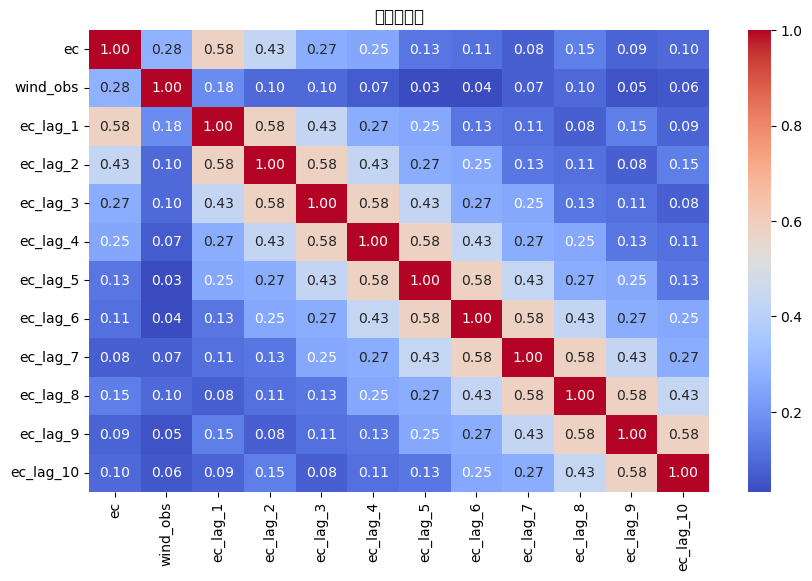

C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24403 (\N{CJK UNIFIED IDEOGRAPH-5F53}) missing from curren

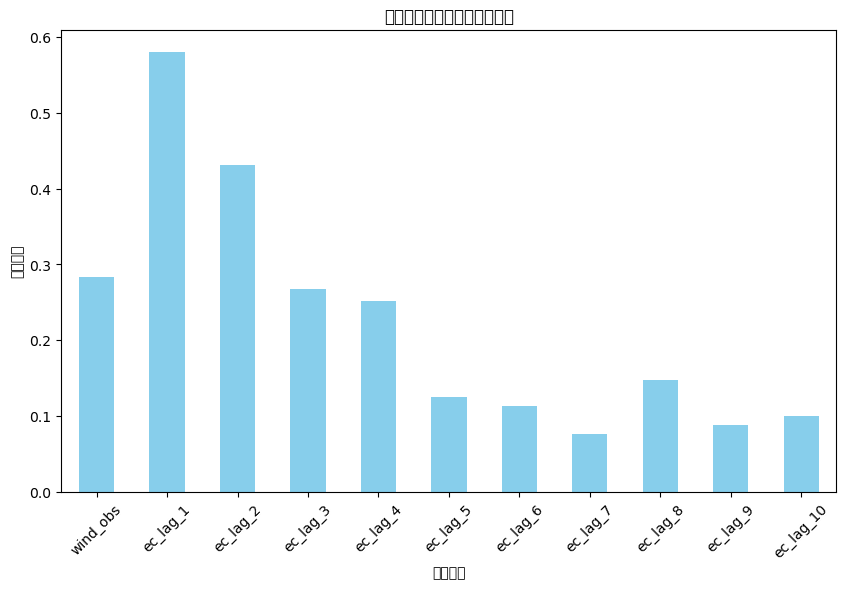

C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


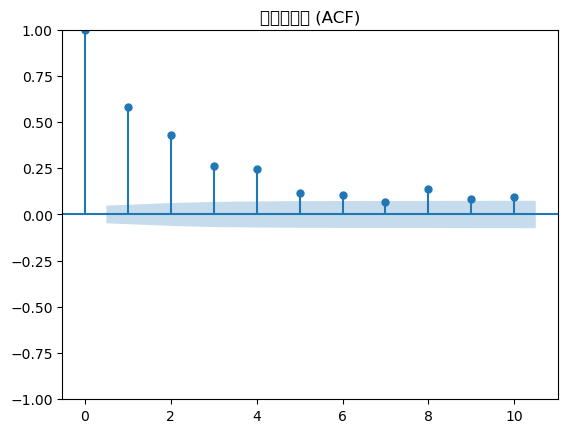

C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20559 (\N{CJK UNIFIED IDEOGRAPH-504F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from curren

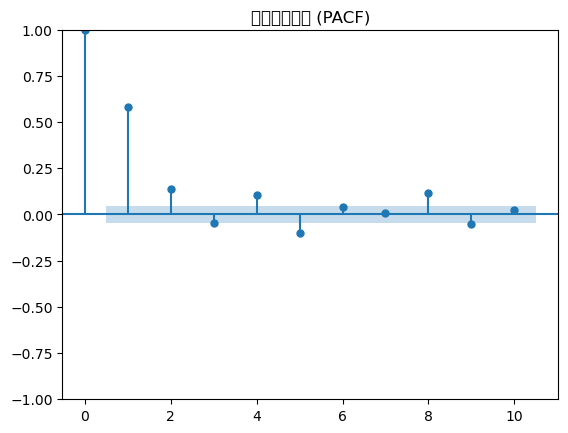

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 从 CSV 文件导入数据
file_path = r'E:\我的桌面\03.01之前风力发电代码\1ECMWF预报数据和11风场观测数据训练模型\ID01.csv'  # 替换为你的 CSV 文件路径
data = pd.read_csv(file_path)

# 确保时间列是 datetime 类型
data['date_time'] = pd.to_datetime(data['date_time'])

# 设置时间列为索引
data.set_index('date_time', inplace=True)

# 指定开始时间（例如：从 2023-05-04 开始）
start_time = '2023-05-04'
data = data[data.index >= start_time]

print(data.head())

# 创建滞后特征（lag features）
max_lag = 10  # 最大滞后步长
for lag in range(1, max_lag + 1):
    data[f'ec_lag_{lag}'] = data['ec'].shift(lag)

# 处理缺失值（滞后特征引入的缺失值）
data.dropna(inplace=True)

print(data.head())

# 计算当前数据与滞后特征的相关性
correlation_matrix = data.corr()

# 提取当前数据与滞后特征的相关性
target_correlation = correlation_matrix['ec'].drop('ec')

print("当前数据与滞后特征的相关性：")
print(target_correlation)

# 选择相关性最强的滞后特征
best_lag = target_correlation.idxmax()
best_correlation = target_correlation.max()

print(f"最佳滞后特征: {best_lag}, 相关性: {best_correlation:.2f}")

# 可视化相关性矩阵
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('相关性矩阵')
plt.show()

# 可视化当前数据与滞后特征的相关性
plt.figure(figsize=(10, 6))
target_correlation.plot(kind='bar', color='skyblue')
plt.title('当前数据与滞后特征的相关性')
plt.xlabel('滞后特征')
plt.ylabel('相关系数')
plt.xticks(rotation=45)
plt.show()

# 绘制自相关函数 (ACF)
plot_acf(data['ec'], lags=max_lag)
plt.title('自相关函数 (ACF)')
plt.show()

# 绘制偏自相关函数 (PACF)
plot_pacf(data['ec'], lags=max_lag)
plt.title('偏自相关函数 (PACF)')
plt.show()

# 换成ID1-6表

                           ec  wind_obs
date_time                              
2023-07-01 00:00:00  2.072650  9.407275
2023-07-01 06:00:00  2.303251  7.082771
2023-07-01 12:00:00  2.444858  4.447188
2023-07-01 18:00:00  3.324518  5.506104
2023-07-02 00:00:00  2.710881  7.442929
                           ec  wind_obs  ec_lag_1  ec_lag_2  ec_lag_3  \
date_time                                                               
2023-07-03 12:00:00  1.605588  4.333608  2.153496  2.300403  2.403595   
2023-07-03 18:00:00  1.843716  4.405263  1.605588  2.153496  2.300403   
2023-07-04 00:00:00  0.747387  3.060083  1.843716  1.605588  2.153496   
2023-07-04 06:00:00  1.994224  9.211588  0.747387  1.843716  1.605588   
2023-07-04 12:00:00  2.956619  4.872050  1.994224  0.747387  1.843716   

                     ec_lag_4  ec_lag_5  ec_lag_6  ec_lag_7  ec_lag_8  \
date_time                                                               
2023-07-03 12:00:00  2.333943  3.331725  2.710881  3.324518  2

C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30697 (\N{CJK UNIFIED IDEOGRAPH-77E9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38453 (\N{CJK UNIFIED IDEOGRAPH-9635}) missing from curren

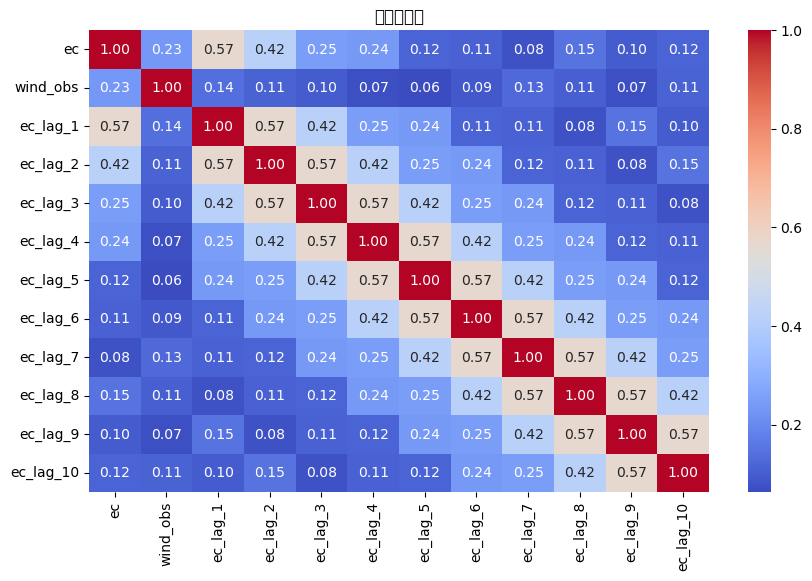

C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24403 (\N{CJK UNIFIED IDEOGRAPH-5F53}) missing from curren

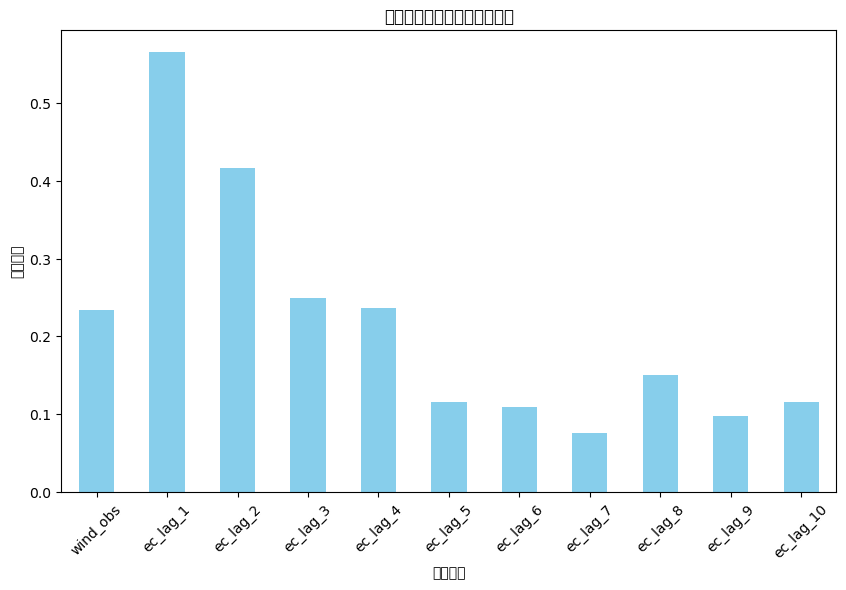

C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


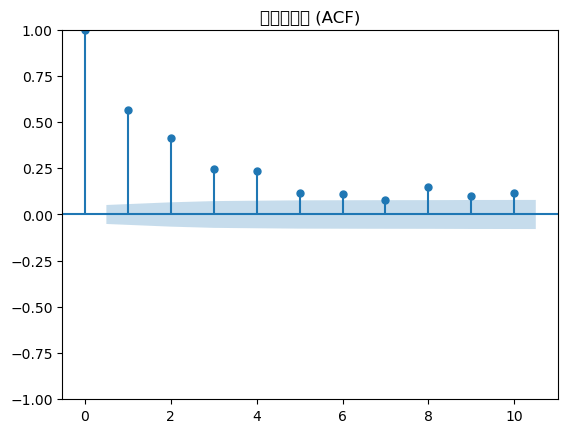

C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20559 (\N{CJK UNIFIED IDEOGRAPH-504F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from curren

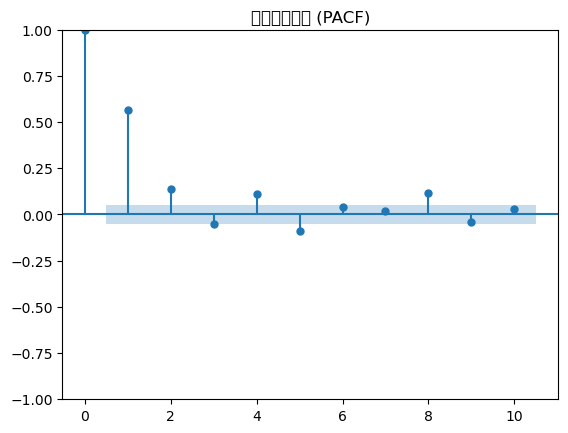

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 从 CSV 文件导入数据
file_path = r'E:\我的桌面\03.01之前风力发电代码\1ECMWF预报数据和11风场观测数据训练模型\ID01-6.csv'  # 替换为你的 CSV 文件路径
data = pd.read_csv(file_path)

# 确保时间列是 datetime 类型
data['date_time'] = pd.to_datetime(data['date_time'])

# 设置时间列为索引
data.set_index('date_time', inplace=True)

# 指定开始时间（例如：从 2023-05-04 开始）
start_time = '2023-07-01'
data = data[data.index >= start_time]

print(data.head())

# 创建滞后特征（lag features）
max_lag = 10  # 最大滞后步长
for lag in range(1, max_lag + 1):
    data[f'ec_lag_{lag}'] = data['ec'].shift(lag)

# 处理缺失值（滞后特征引入的缺失值）
data.dropna(inplace=True)

print(data.head())

# 计算当前数据与滞后特征的相关性
correlation_matrix = data.corr()

# 提取当前数据与滞后特征的相关性
target_correlation = correlation_matrix['ec'].drop('ec')

print("当前数据与滞后特征的相关性：")
print(target_correlation)

# 选择相关性最强的滞后特征
best_lag = target_correlation.idxmax()
best_correlation = target_correlation.max()

print(f"最佳滞后特征: {best_lag}, 相关性: {best_correlation:.2f}")

# 可视化相关性矩阵
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('相关性矩阵')
plt.show()

# 可视化当前数据与滞后特征的相关性
plt.figure(figsize=(10, 6))
target_correlation.plot(kind='bar', color='skyblue')
plt.title('当前数据与滞后特征的相关性')
plt.xlabel('滞后特征')
plt.ylabel('相关系数')
plt.xticks(rotation=45)
plt.show()

# 绘制自相关函数 (ACF)
plot_acf(data['ec'], lags=max_lag)
plt.title('自相关函数 (ACF)')
plt.show()

# 绘制偏自相关函数 (PACF)
plot_pacf(data['ec'], lags=max_lag)
plt.title('偏自相关函数 (PACF)')
plt.show()

                           ec  wind_obs
date_time                              
2023-07-01 00:00:00  2.072650  9.407275
2023-07-01 06:00:00  2.303251  7.082771
2023-07-01 12:00:00  2.444858  4.447188
2023-07-01 18:00:00  3.324518  5.506104
2023-07-02 00:00:00  2.710881  7.442929
                           ec  wind_obs  ec_lag_1  ec_lag_2  ec_lag_3  \
date_time                                                               
2023-07-03 12:00:00  1.605588  4.333608  2.858254  5.621500  3.048083   
2023-07-03 18:00:00  1.843716  4.405263  4.333608  2.858254  5.621500   
2023-07-04 00:00:00  0.747387  3.060083  4.405263  4.333608  2.858254   
2023-07-04 06:00:00  1.994224  9.211588  3.060083  4.405263  4.333608   
2023-07-04 12:00:00  2.956619  4.872050  9.211588  3.060083  4.405263   

                     ec_lag_4  ec_lag_5  ec_lag_6  ec_lag_7  ec_lag_8  \
date_time                                                               
2023-07-03 12:00:00  2.121212  4.029658  7.442929  5.506104  4

C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30697 (\N{CJK UNIFIED IDEOGRAPH-77E9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38453 (\N{CJK UNIFIED IDEOGRAPH-9635}) missing from curren

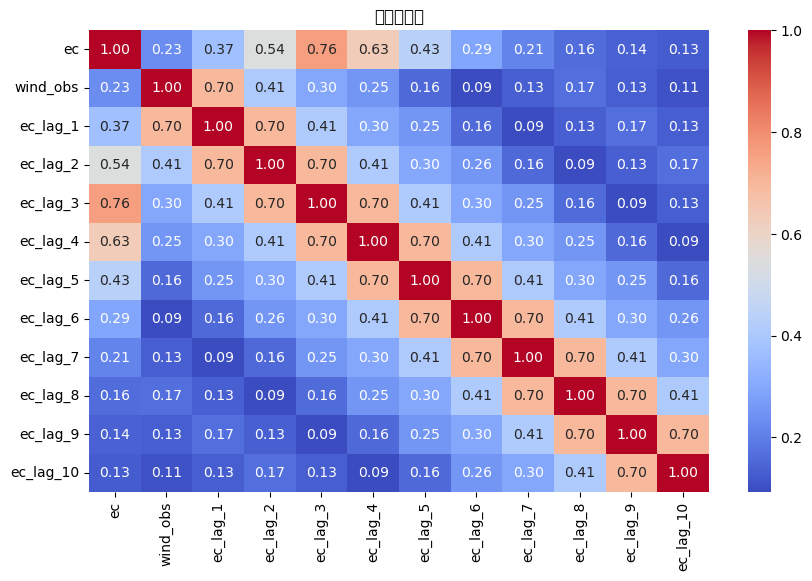

C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24403 (\N{CJK UNIFIED IDEOGRAPH-5F53}) missing from curren

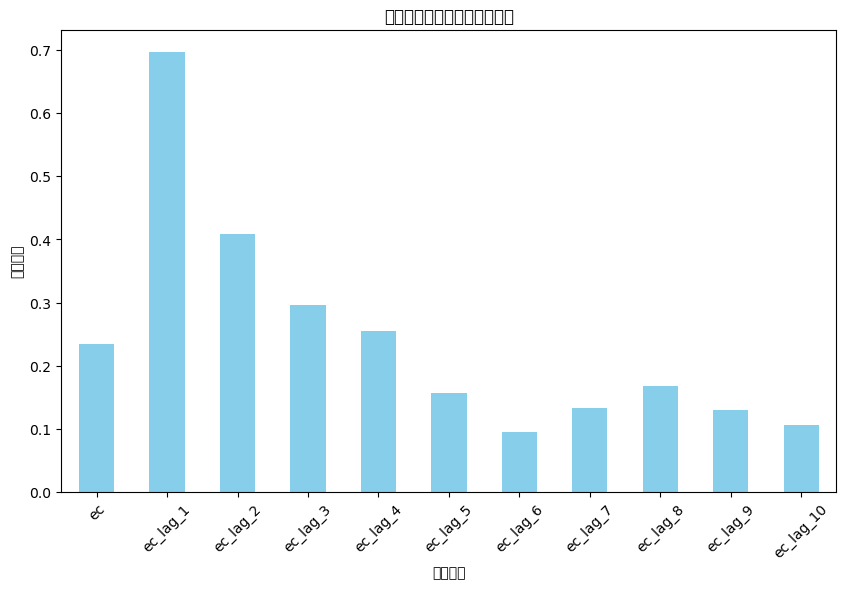

C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


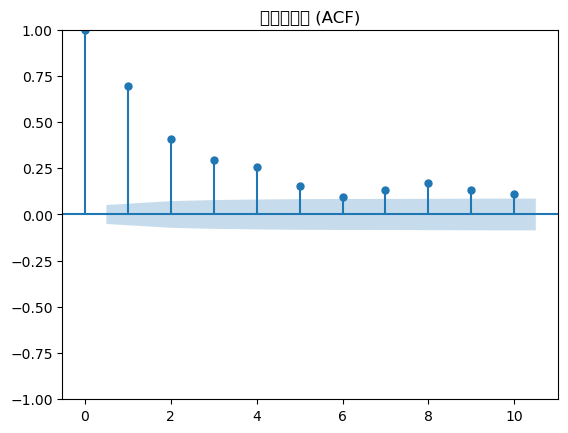

C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20559 (\N{CJK UNIFIED IDEOGRAPH-504F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\11712\.conda\envs\grib_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from curren

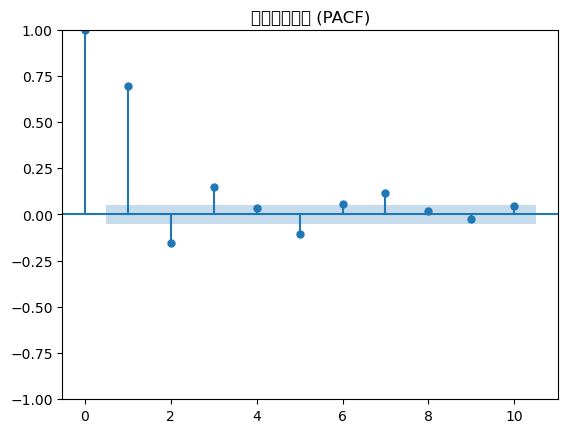

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 从 CSV 文件导入数据
file_path = r'E:\我的桌面\03.01之前风力发电代码\1ECMWF预报数据和11风场观测数据训练模型\ID01-6.csv'  # 替换为你的 CSV 文件路径
data = pd.read_csv(file_path)

# 确保时间列是 datetime 类型
data['date_time'] = pd.to_datetime(data['date_time'])

# 设置时间列为索引
data.set_index('date_time', inplace=True)

# 指定开始时间（例如：从 2023-05-04 开始）
start_time = '2023-07-01'
data = data[data.index >= start_time]

print(data.head())

# 创建滞后特征（lag features）
max_lag = 10  # 最大滞后步长
for lag in range(1, max_lag + 1):
    data[f'ec_lag_{lag}'] = data['wind_obs'].shift(lag)

# 处理缺失值（滞后特征引入的缺失值）
data.dropna(inplace=True)

print(data.head())

# 计算当前数据与滞后特征的相关性
correlation_matrix = data.corr()

# 提取当前数据与滞后特征的相关性
target_correlation = correlation_matrix['wind_obs'].drop('wind_obs')

print("当前数据与滞后特征的相关性：")
print(target_correlation)

# 选择相关性最强的滞后特征
best_lag = target_correlation.idxmax()
best_correlation = target_correlation.max()

print(f"最佳滞后特征: {best_lag}, 相关性: {best_correlation:.2f}")

# 可视化相关性矩阵
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('相关性矩阵')
plt.show()

# 可视化当前数据与滞后特征的相关性
plt.figure(figsize=(10, 6))
target_correlation.plot(kind='bar', color='skyblue')
plt.title('当前数据与滞后特征的相关性')
plt.xlabel('滞后特征')
plt.ylabel('相关系数')
plt.xticks(rotation=45)
plt.show()

# 绘制自相关函数 (ACF)
plot_acf(data['wind_obs'], lags=max_lag)
plt.title('自相关函数 (ACF)')
plt.show()

# 绘制偏自相关函数 (PACF)
plot_pacf(data['wind_obs'], lags=max_lag)
plt.title('偏自相关函数 (PACF)')
plt.show()